<a href="https://colab.research.google.com/github/krishchat/Resturant-Sales-and-Tips/blob/main/Resturant%20Sales%20and%20Tips_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**:



Chef's Kitchen is one of the most popular restaurants in the city of San Diego and acts as a one-stop destination for food lovers. The polite and efficient service provided by the restaurant staff often gets them tips from the customer. As a Data Analyst for the restaurant, you have been asked to analyze the data provided to identify the patterns and trends in the revenue and tips received from customers across different demographies and come up with informative visualizations to convey the insights obtained from the analysis.


**The dataset consists of the following features:**

**order_id**: unique identifier of each order

**day**: day of the week on which the customer visited the restaurant (Thur/Fri/Sat/Sun)

**time**: time of the day at which the customer visited the restaurant (Lunch or Dinner)

**size**: number of people present at the table

**smoker**: whether the table included smokers (No: The table did not include smokers, Yes: The table included smokers)

**sex**: gender of the payer of the bill (Male or Female)

**total_bill**: the bill amount in dollars

**tip**: the tip amount in dollars

 
 
 **Key Steps to be performed:**



1.   Import all the necessary packages and load the dataset
2.   Get a brief overview of the dataset
3. Explore the dataset to come up with meaningful insights


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rData = pd.read_csv('/content/drive/MyDrive/PGP - AI ML Course/MLS - 2 - Tips Case Study/tips.csv')

In [ ]:
# See Data Properties - Shape, Size and Dimension
rData.shape, rData.size, rData.ndim

((244, 8), 1952, 2)

In [ ]:
rData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    244 non-null    int64  
 1   day         244 non-null    object 
 2   time        244 non-null    object 
 3   size        244 non-null    int64  
 4   smoker      244 non-null    object 
 5   sex         244 non-null    object 
 6   total_bill  244 non-null    float64
 7   tip         244 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [ ]:
#Checking NULL values

rData.isnull().sum()

order_id      0
day           0
time          0
size          0
smoker        0
sex           0
total_bill    0
tip           0
dtype: int64

In [ ]:
rData['Tips_Perc'] = round((rData['tip']*100 )/ rData['total_bill'], 2)

In [ ]:
rData.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,244.0,122.500000,70.580923,1.00,61.7500,122.500,183.2500,244.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
Tips_Perc,244.0,16.079754,6.107020,3.56,12.9100,15.475,19.1475,71.03


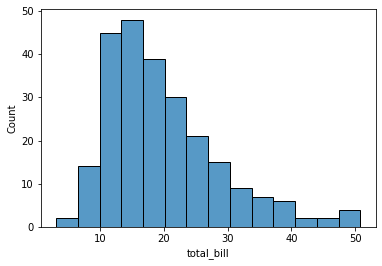

In [ ]:
#plt.figure(figsize= (20,7))
sns.histplot(data= rData, x='total_bill');

In [ ]:
rData.head()

,order_id,day,time,size,smoker,sex,total_bill,tip,Tips_Perc
0,1,Sun,Dinner,2,No,Female,16.99,1.01,5.94
1,2,Sun,Dinner,3,No,Male,10.34,1.66,16.05
2,3,Sun,Dinner,3,No,Male,21.01,3.50,16.66
3,4,Sun,Dinner,2,No,Male,23.68,3.31,13.98
4,5,Sun,Dinner,4,No,Female,24.59,3.61,14.68


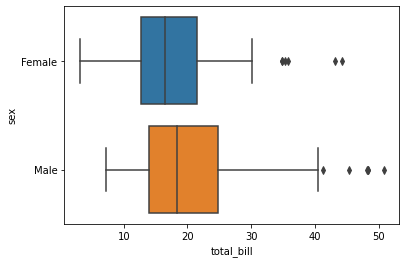

In [ ]:
#Check for Outliers in total_bill

sns.boxplot(data=rData, x='total_bill', y='sex');

In [ ]:
rData['smoker'] = rData['smoker'].apply(lambda x: 0 if x == 'No' else 1)

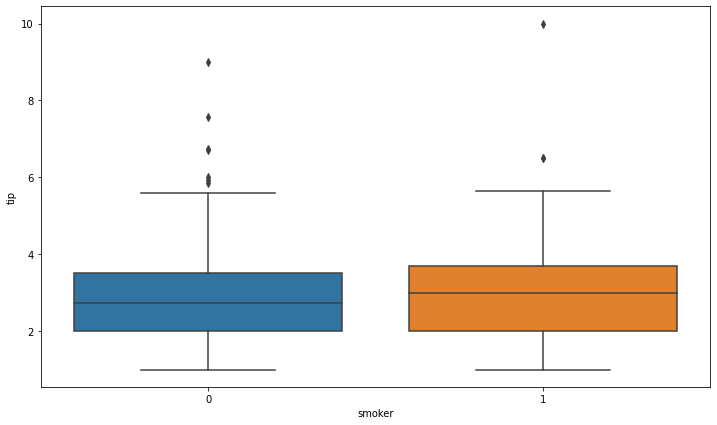

In [ ]:
# Smokers & Tip

rData.corr()

plt.figure(figsize= (12,7))
sns.boxplot(data= rData, x='smoker', y='tip');

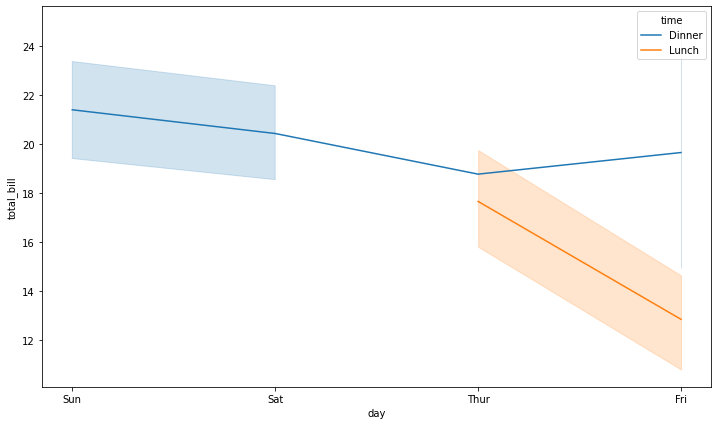

In [ ]:
# Lunch in the Weekday
# Dinner in Weekends
# Nothing from Mon, Tue and Wed

plt.figure(figsize=(12,7))
sns.lineplot(data= rData, x='day', y='total_bill', hue = 'time');

In [ ]:
rData['sex'] = rData['sex'].apply(lambda x: 0 if x == 'Female' else 1)

<Figure size 864x504 with 0 Axes>

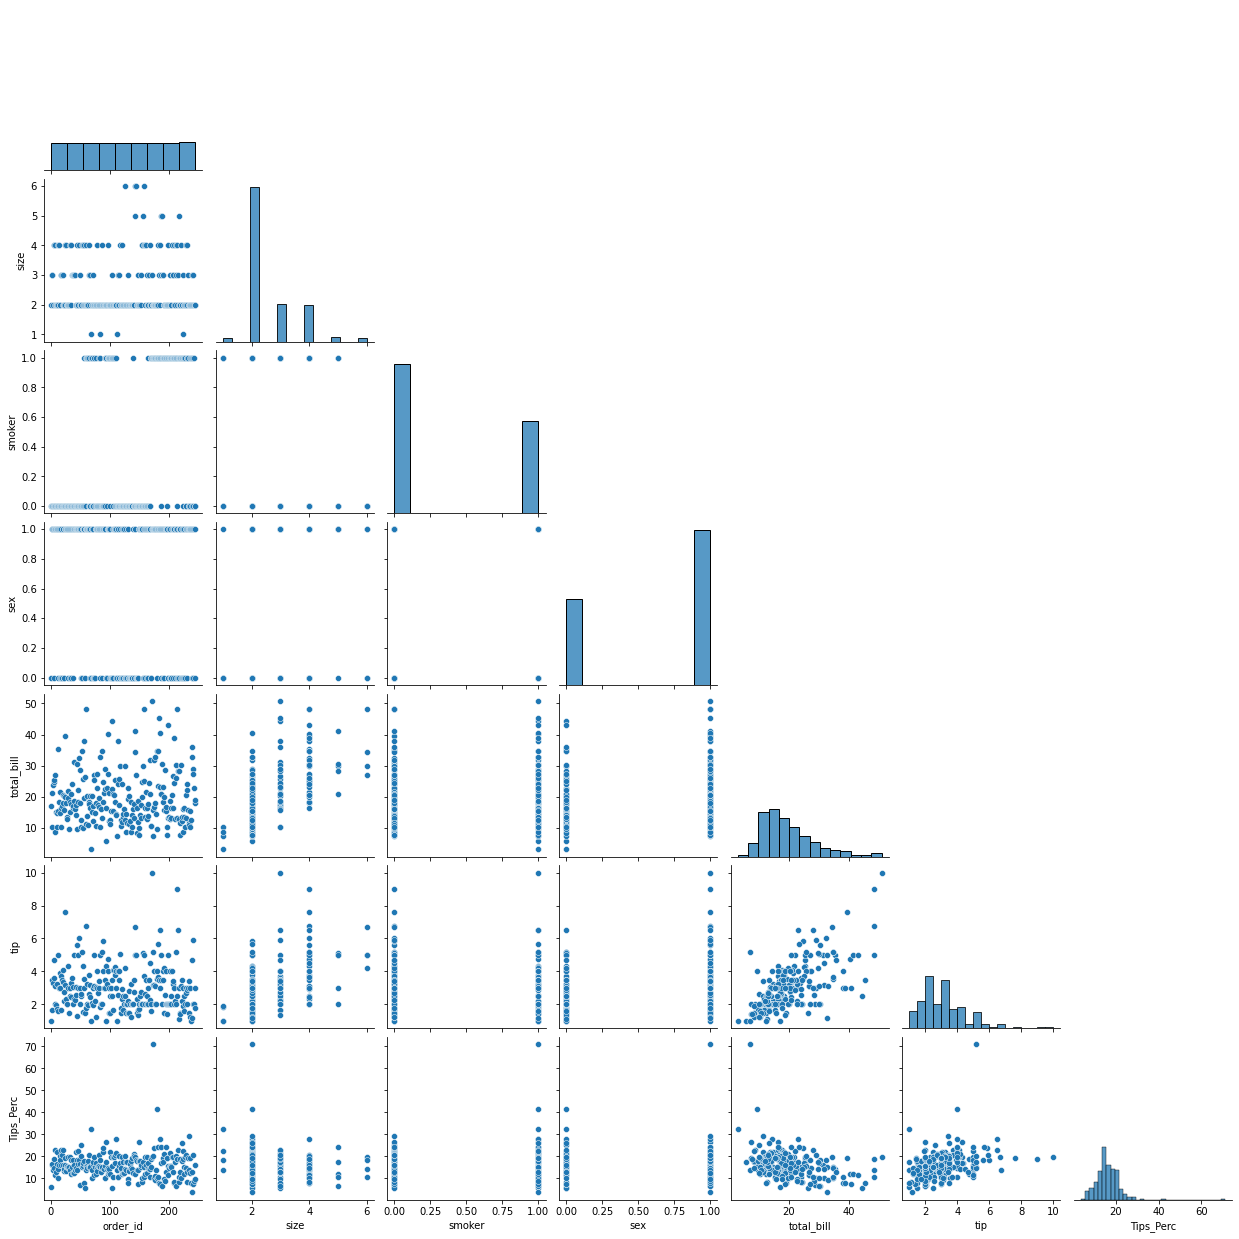

In [ ]:
# Smokers are worst tipper

rData.corr()

plt.figure(figsize= (12,7))
sns.pairplot(data = rData, corner = True);

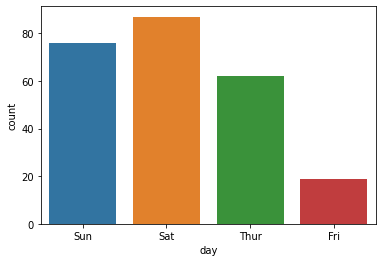

In [ ]:
sns.countplot(data= rData, x= 'day')

The number of orders is more during the weekends than the weekdays.

The highest number of orders is received on Saturdays

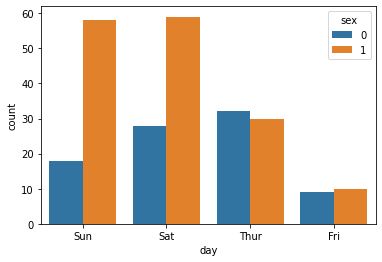

In [ ]:
sns.countplot(data = rData, x='day', hue='sex');